# Logistic Regression by Gradient Descent
### Kirill Zakharov

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.metrics import accuracy_score

plt.style.use('ggplot')

In [2]:
data = pd.read_csv('binary_classification.csv', sep=',')

In [3]:
data.head()

,X1,X2,y
0,0.345211,0.679774,1
1,0.191130,0.551668,0
2,0.358081,0.012984,1
3,0.393526,0.994465,0
4,0.387360,0.941051,0


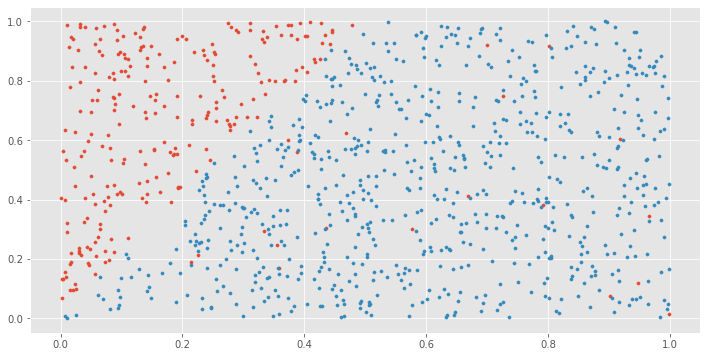

In [4]:
plt.subplots(figsize=(12,6))

for i, j in data.groupby('y'):
    plt.scatter(j['X1'], j['X2'], s=10)

In [5]:
def dx(f, x, y, h):
    return (f(x + h, y) - f(x, y))/h

def dy(f, x, y, h):
    return (f(x, y + h) - f(x, y))/h

def grad(f, x, y, h):
    return (dx(f, x, y, h), dy(f, x, y, h))

In [115]:
def gradient_descent(f, x0, y0, n, eps):
    t = 1
    x = x0
    y = y0
    
    step = 0.1
    
    x1 = x - step * grad(f, x, y, 0.001)[0]
    y1 = y - step * grad(f, x, y, 0.001)[1]
    
    x_array = [x1]
    y_array = [y1]
    
    while t < n and abs(f(x, y) - f(x1, y1)) > eps:
        x = x1
        y = y1
        
        x1 = x - step * grad(f, x, y, 0.001)[0]
        y1 = y - step * grad(f, x, y, 0.001)[1]
        t += 1
        
        x_array.append(x1)
        y_array.append(y1)
        
    return x_array, y_array, (x1, y1), f(x1, y1)

In [121]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def prob(theta, x):
    return sigmoid(np.dot(theta, x))


n = len(data)

y = data['y'].values
x1 = data['X1'].values
x2 = data['X2'].values

# x_new = np.array([np.ones(n).reshape(-1, 1), x1.reshape(-1, 1), x2.reshape(-1, 1)]).T
x_new = np.array([x1, x2])

def fun_Q(th0, th1):
    return -sum(y * np.log(prob([th0, th1], x_new)) + (1-y) * np.log(prob([th0, th1], x_new)))/n

In [122]:
result = gradient_descent(fun_Q, 0, 0, 1000, 10**(-5))
th0, th1 = result[2]

In [123]:
print(f'Min: ({th0}, {th1})\nQuality Function: {fun_Q(th0, th1)}')

Min: (3.941932376094481, 3.930196852929647)
Quality Function: 0.05649005885214684


In [124]:
val = np.dot([th0, th1], x_new)
y_pred = np.zeros(n)

for i in range(n):
    if  val[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [125]:
accuracy_score(y, y_pred)

0.739